### **Lab Instructions**

#### **1. Import Required Libraries**
Start by importing the necessary Python libraries.

In [1]:
#load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### **2. Load the Dataset**
Use a sample dataset or generate synthetic time series data.

In [2]:
# Load the water usage dataset
df = pd.read_csv("Water_Usage_Data.csv", parse_dates=["Date"], index_col="Date")

# Display the first few rows of the dataset for residential_gallons and industrial_gallons
print(df[["residential_gallons", "industrial_gallons"]].head())

            residential_gallons  industrial_gallons
Date                                               
2019-01-01          6896553.991         372027.0000
2019-01-02          7262534.651         538747.0000
2019-01-03          6214681.059         602900.0000
2019-01-04          6032113.704         613821.9999
2019-01-05          6678241.313         430945.0000


#### **3. Visualize the Dataset**
Plot the raw time series data

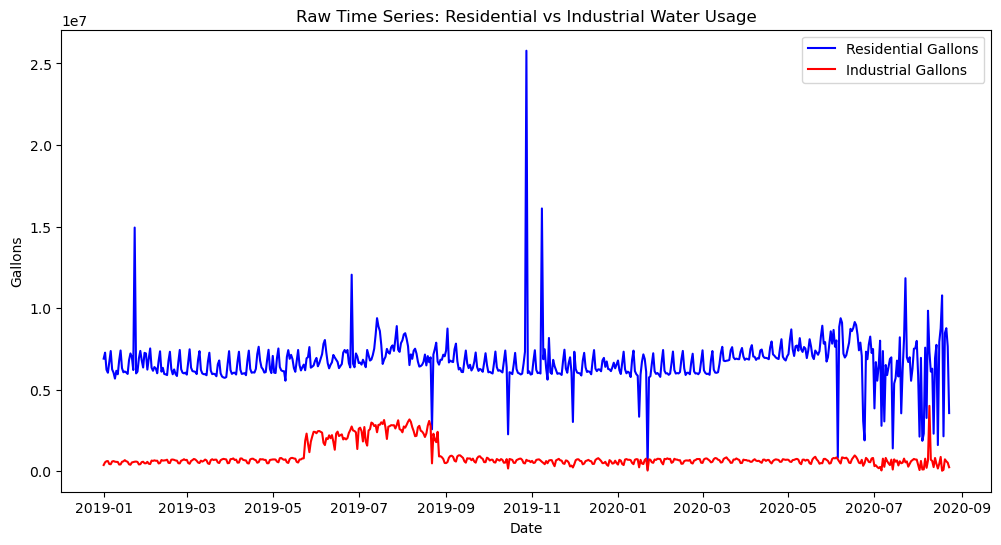

In [3]:
# Plot the raw time series data for both variables
plt.figure(figsize=(12,6))
plt.plot(df.index, df["residential_gallons"], label="Residential Gallons", color="blue")
plt.plot(df.index, df["industrial_gallons"], label="Industrial Gallons", color="red")
plt.legend()
plt.title("Raw Time Series: Residential vs Industrial Water Usage")
plt.xlabel("Date")
plt.ylabel("Gallons")
plt.show()

#### **4. Transform the visualization**


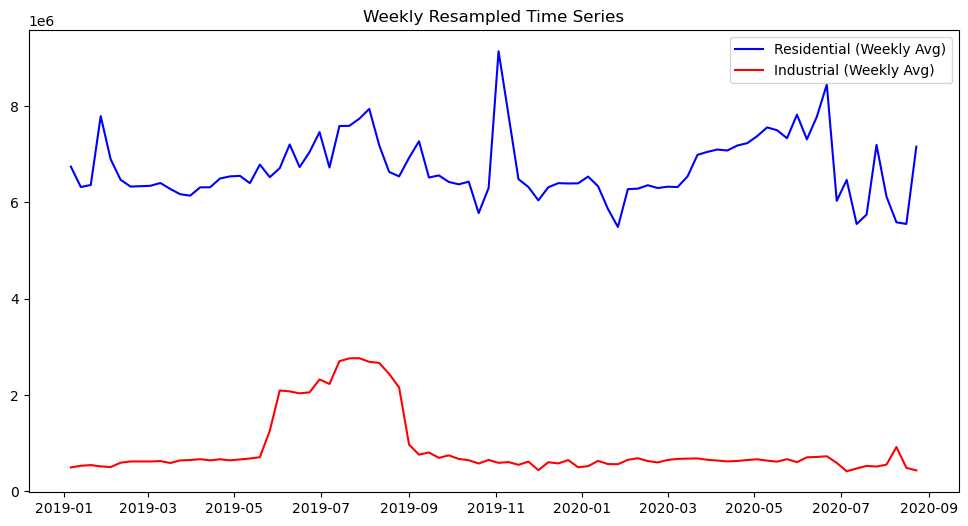

In [4]:
# Resample to weekly average
weekly = df[["residential_gallons", "industrial_gallons"]].resample("W").mean()

plt.figure(figsize=(12,6))
plt.plot(weekly.index, weekly["residential_gallons"], label="Residential (Weekly Avg)", color="blue")
plt.plot(weekly.index, weekly["industrial_gallons"], label="Industrial (Weekly Avg)", color="red")
plt.legend()
plt.title("Weekly Resampled Time Series")
plt.show()

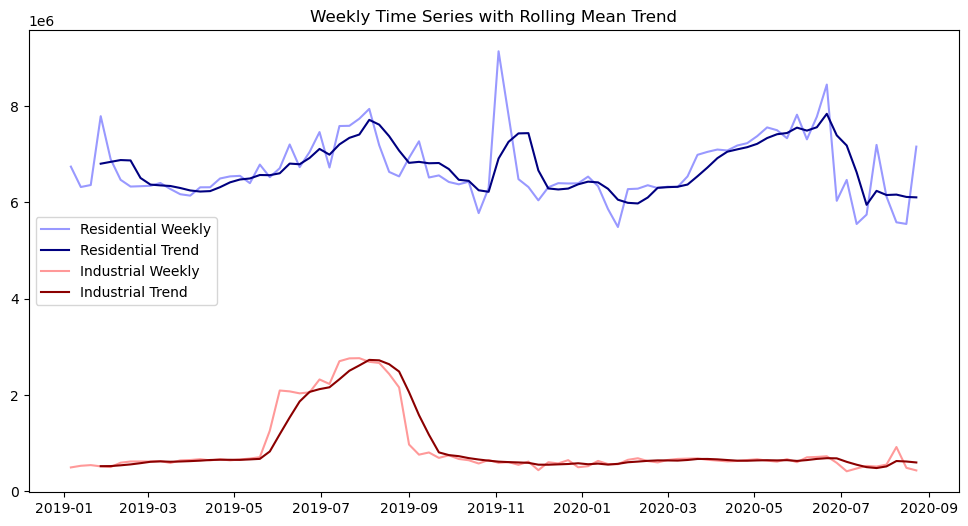

In [5]:
# Rolling mean with a 4-week window
rolling = weekly.rolling(window=4).mean()

plt.figure(figsize=(12,6))
plt.plot(weekly.index, weekly["residential_gallons"], alpha=0.4, color="blue", label="Residential Weekly")
plt.plot(rolling.index, rolling["residential_gallons"], color="navy", label="Residential Trend")

plt.plot(weekly.index, weekly["industrial_gallons"], alpha=0.4, color="red", label="Industrial Weekly")
plt.plot(rolling.index, rolling["industrial_gallons"], color="darkred", label="Industrial Trend")

plt.legend()
plt.title("Weekly Time Series with Rolling Mean Trend")
plt.show()

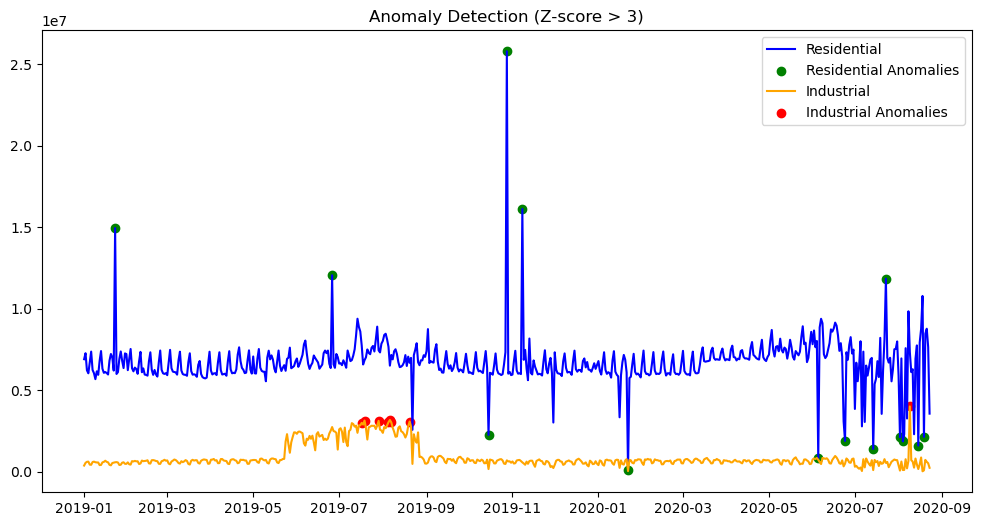

In [6]:
from scipy.stats import zscore

# Calculate Z-scores
df_z = df[["residential_gallons", "industrial_gallons"]].apply(zscore)

# Identify anomalies (|z| > 3)
res_anomalies = df[df_z["residential_gallons"].abs() > 3]
ind_anomalies = df[df_z["industrial_gallons"].abs() > 3]

# Plot with anomalies highlighted
plt.figure(figsize=(12,6))
plt.plot(df.index, df["residential_gallons"], label="Residential", color="blue")
plt.scatter(res_anomalies.index, res_anomalies["residential_gallons"], color="green", label="Residential Anomalies")

plt.plot(df.index, df["industrial_gallons"], label="Industrial", color="orange")
plt.scatter(ind_anomalies.index, ind_anomalies["industrial_gallons"], color="red", label="Industrial Anomalies")

plt.legend()
plt.title("Anomaly Detection (Z-score > 3)")
plt.show()
